20201004_192420mSPRUT.00
(0.013000000000000001, 3.189623042776687)
Не определено точно вступление
20201006_070500mSPRUT.00
(0.722, 33.46031147584726)
20201016_035110mSPRUT.00
(6.115, 49.17195652673618)
20201028_155120mSPRUT.00
(6.897, 36.90725677379972)
20201105_213950mSPRUT.00
(4.223, 21.028116808036557)
20201110_204540mSPRUT.00
(2.785, 24.10870897282162)
20201112_015100mSPRUT.00
(9.0955, 32.26874752072946)
20201112_015110mSPRUT.00
(0.0005, -15.473313140814863)
Не определено точно вступление
20201120_032720mSPRUT.00
(-1.0, -1.0)
Не определено точно вступление
20201120_032730mSPRUT.00
(-1.0, -1.0)
Не определено точно вступление
20201122_151757mSPRUT.00
(7.0405, 27.880262955055745)
20201123_161807mSPRUT.00
(2.4010000000000002, 34.252460936855776)
20201204_044417mSPRUT.00
(0.001, 0.6690786340626088)
Не определено точно вступление
20201204_044427mSPRUT.00
(-1.0, -1.0)
Не определено точно вступление
20201210_165847mSPRUT.00
(0.0005, 3.1471208510107447)
Не определено точно вступление
202012

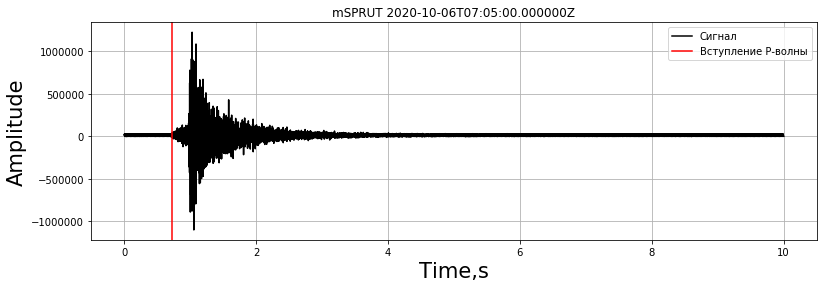

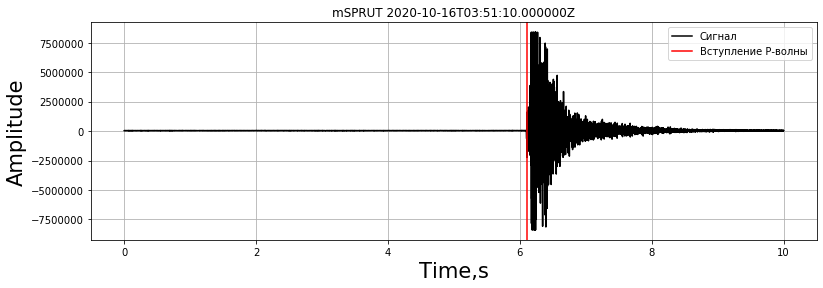

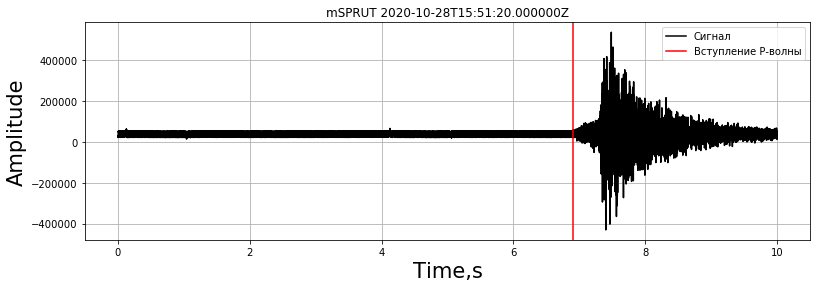

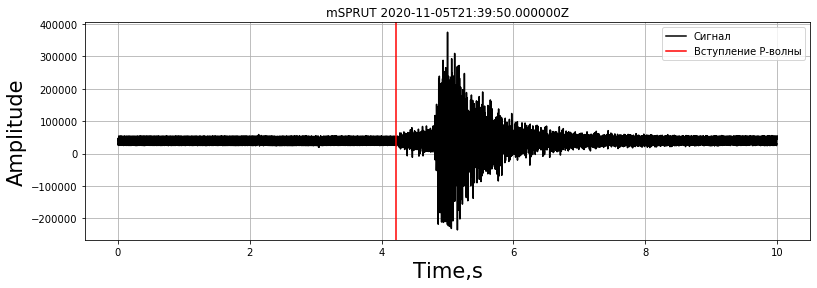

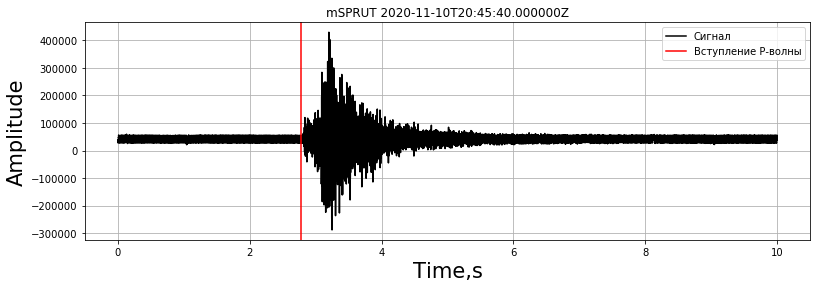

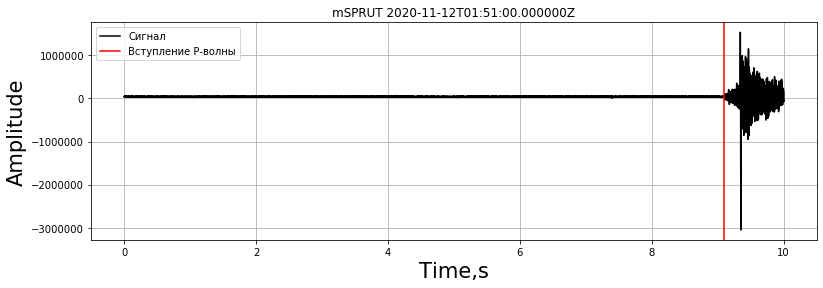

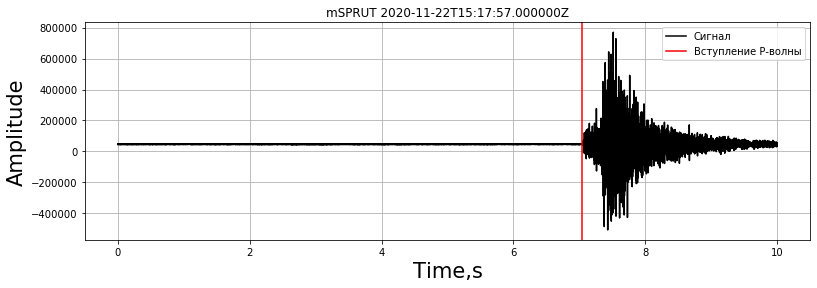

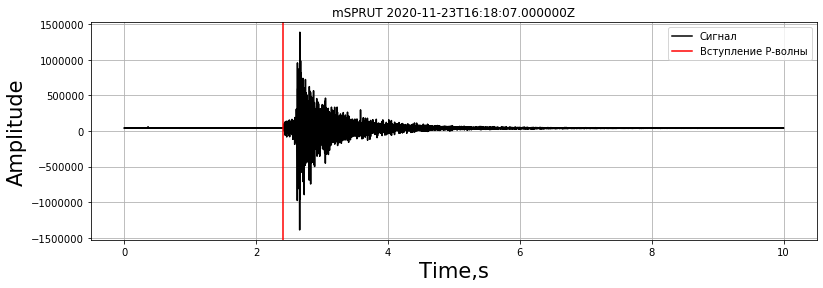

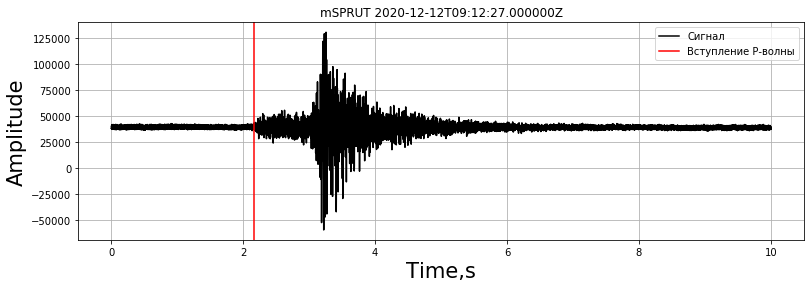

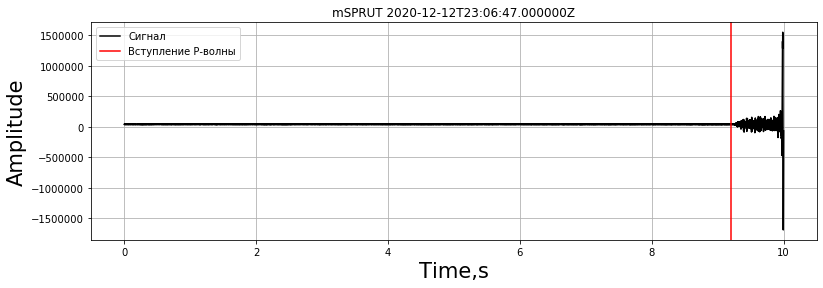

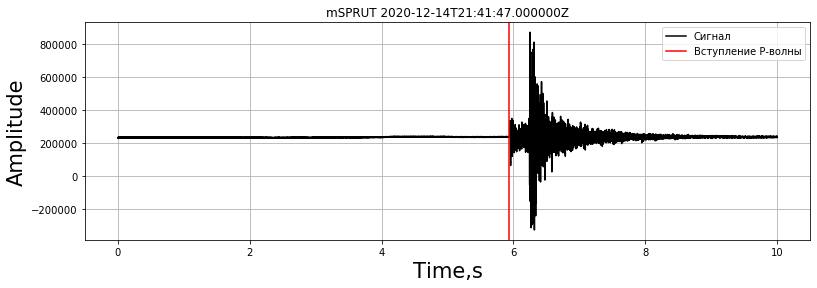

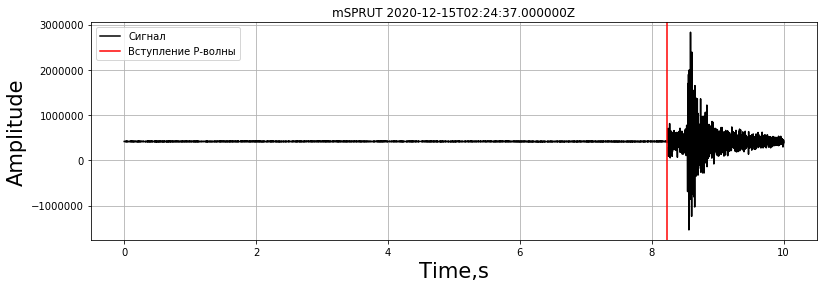

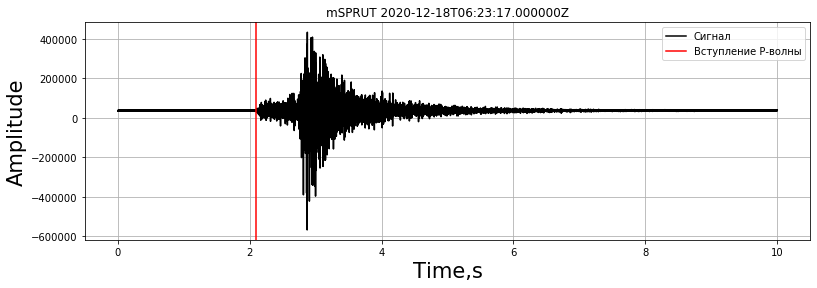

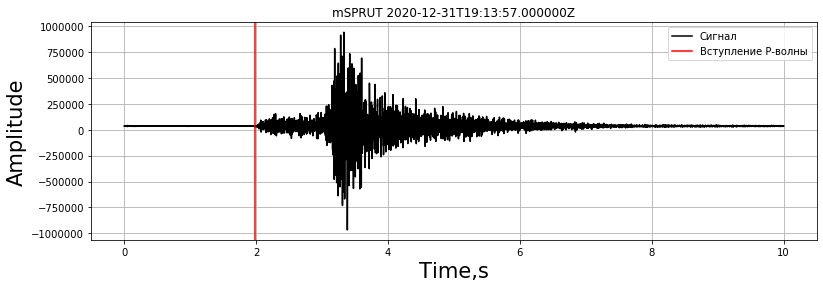

In [14]:
import os
import glob
import numpy as np
import struct as st
import pandas as pd
import matplotlib.pyplot as plt
import PphasePicker
import obspy as obs
#import datetime
#begin_time = datetime.datetime.now()

for filename in os.listdir(r"C:\Users\GLEB2001\Питон\Записи\Записи\Скважина 125"):
    if filename.endswith('.00'):
        with open(os.path.join(r"C:\Users\GLEB2001\Питон\Записи\Записи\Скважина 125", filename),'rb') as f:
            data = []
            chanel_number = []
            chanel_name = []
            sensor_type = []
            chanel_coef = []
            chanels = st.unpack('H', f.read(2))[0] # Колличество каналов
            f.read(2)
            version = st.unpack('H', f.read(2))[0] # Версия
            day = st.unpack('H', f.read(2))[0] # День
            month = st.unpack('H', f.read(2))[0] # Месяц
            year = st.unpack('H', f.read(2))[0] # Год
            f.read(6)
            acp = st.unpack('H', f.read(2))[0] # Разрядность АЦП
            f.read(2)
            freq = st.unpack('H', f.read(2))[0] # Частота
            f.read(8)
            station_name = st.unpack('6s10c', f.read(16))[0] # Название станции
            station_name = str(station_name).replace('b', '')
            station_name = station_name.replace("'", '')
            f.read(24)
            lat = st.unpack('d', f.read(8))[0] # Широта
            long = st.unpack('d', f.read(8))[0] # Долгота
            f.read(16)
            time = st.unpack('Q', f.read(8))[0] # Начальное время
            time_start = obs.UTCDateTime(time / 256000000 + 315532800)
            f.read(8)
            for i in range(chanels): 
                chanel_number.append(st.unpack('H', f.read(2))[0]) # Номер канала
                f.read(6)
                chanel_name.append(st.unpack('6i', f.read(24))[0]) # Имя канала
                sensor_type.append(st.unpack('6i', f.read(24))[0]) # Тип сенсора
                chanel_coef.append(st.unpack('d', f.read(8))[0]) # Коэффициент канала
                f.read(8)

            for j in range(1000000000):
                try:
                    data.append(st.unpack('i', f.read(4))[0])
                except:
                    break
            print(filename)
            for i in range(chanels):
                if chanels == chanels:
                    one = data[0::32]
                    two= data[1::32]
                    three= data[2::32]
                    four= data[3::32]
                    five= data[4::32]
                    six= data[5::32]
                    seven= data[6::32]
                    eight= data[7::32]
                    nine= data[8::32]
                    ten= data[9::32]
                    eleven= data[10::32]
                    twelve= data[11::32]
                    thirteen= data[12::32]
                    fourteen= data[13::32]
                    fifteen= data[14::32]
                    sixteen= data[15::32]
                    seventeen= data[16::32]
                    eighteen= data[17::32]
                    nineteen= data[18::32]
                    twenty= data[19::32]
                    twentyone= data[20::32]
                    twentytwo= data[21::32]
                    twentythree= data[22::32]
                    twentyfour= data[23::32]
                    twentyfive= data[24::32]
                    twentysix= data[25::32]
                    twentyseven= data[26::32]
                    twentyeight= data[27::32]
                    twentynine= data[28::32]
                    thirty= data[29::32]
                    thirtyone= data[30::32]
                    thirtytwo= data[31::32]
            
            #print(datetime.datetime.now() - begin_time)
    
            #---------------------------------------
        
            # считаем вступление, создаём даты, рисуем рисунки
            res = PphasePicker.calculatePphasePicker(thirty, 0.0005) # меняем каналы!!!!
            print(res)
            dt=np.arange(0, len(thirty)*0.0005, 0.0005) # меняем каналы!!!!
            if res[0]<=0.1:
                print('Не определено точно вступление')
            else:
                plt.figure(figsize=(13, 4))
                plt.plot(dt, one,label='Сигнал',color='black')
                plt.axvline(res[0],color='red',label='Вступление P-волны')
                plt.xlabel('Time,s',fontsize=21)
                plt.ylabel('Amplitude',fontsize=21)
                plt.title(station_name + ' ' + str(time_start))
                plt.grid()
                plt.legend()
                plt.savefig('вступление')
                
                